<h1>
    Assignment 5
</h1>
<h3>Step 466</h3>
<hr>

In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

In [4]:
diamond = sns.load_dataset('diamonds')

In [5]:
diamond

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


<h3>Univariate Analysis </h3>

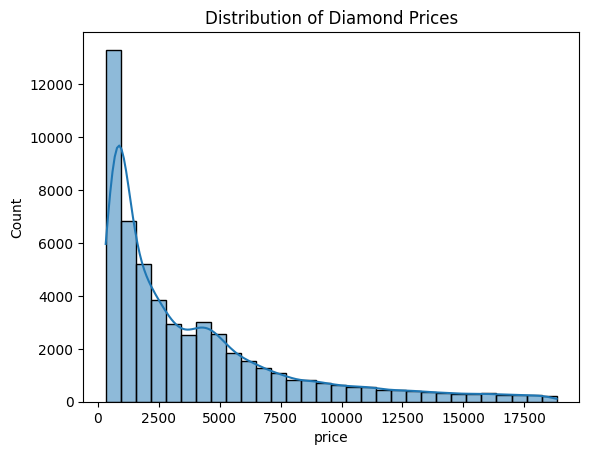

In [6]:

# Histogram for 'price'
sns.histplot(diamond, x='price', kde=True, bins=30)
plt.title('Distribution of Diamond Prices')
plt.show()

In [8]:
from scipy.stats import skew, kurtosis

# Example for 'price'
skewness_price = skew(diamond['price'])
kurtosis_price = kurtosis(diamond['price'])

print(f"Skewness: {skewness_price}")
print(f"Kurtosis: {kurtosis_price}")

Skewness: 1.6183502776053016
Kurtosis: 2.177382669056634


<h3>Multivariate Analysis </h3>

<h5>Heat Map Correlation </h5>

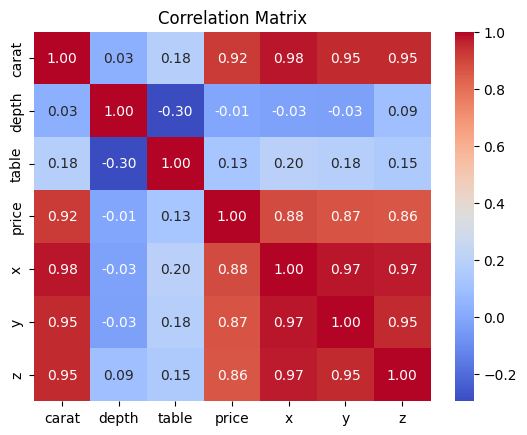

In [14]:
# Compute correlation matrix
# Select only numerical columns
numerical_columns = diamond.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numerical_columns.corr()


# Visualize with a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

<h4>Chi Square </h4>

In [16]:
from scipy.stats import chi2_contingency

# Contingency table for 'cut' and 'color'
contingency_table = pd.crosstab(diamond['cut'], diamond['color'])

# Perform Chi-Square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2}, P-value: {p_value}")

contingency_table

Chi-Square Statistic: 310.3179005211542, P-value: 1.3945120919852248e-51


color,D,E,F,G,H,I,J
cut,,,,,,,
Ideal,2834,3903,3826,4884,3115,2093,896
Premium,1603,2337,2331,2924,2360,1428,808
Very Good,1513,2400,2164,2299,1824,1204,678
Good,662,933,909,871,702,522,307
Fair,163,224,312,314,303,175,119
